In [2]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [3]:
df=pd.read_csv("data.csv")

In [4]:
df.head()

,input,output
0,2,21
1,3,31
2,4,41
3,5,51
4,7,71


In [5]:
x=df[["input"]].values
y=df[["output"]].values

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [7]:
model=Sequential([Dense(16,activation='relu'),
                  Dense(8,activation='relu'),
                  Dense(1)])

In [8]:
model.compile(loss="mae",optimizer="adam",metrics=["mse"])

In [9]:
history=model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 813ms/step - loss: 92.9002 - mse: 10680.9453
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 92.8508 - mse: 10669.7119
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 92.8011 - mse: 10658.4258
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 92.7511 - mse: 10647.0850
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 92.7009 - mse: 10635.6904
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 92.6504 - mse: 10624.2373
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 92.5997 - mse: 10612.7285
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 92.5503 - mse: 10601.5020
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 92.5038 - mse: 10590.9805
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 92.4570 - mse: 10580.3848
Epoch 11/1000


In [11]:
pred=model.predict(x_test)
tf.round(pred)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[101.],
       [171.],
       [ 41.]], dtype=float32)>

In [13]:
tf.round(model.predict([[50]]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[501.]], dtype=float32)>

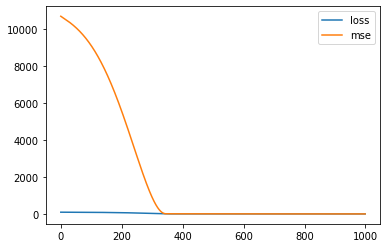

In [14]:
pd.DataFrame(history.history).plot()

In [16]:
r=tf.keras.metrics.RootMeanSquaredError()
r(y_test,pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.052997652>